In [21]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'      # Windows 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示为方块的问题

# 加载波士顿房价数据集
boston = fetch_openml(name="boston", version=1, as_frame=True)


X = boston.data.select_dtypes(['float64', 'int64'])
y = boston.target
print("X:\n", X)
print("y:\n", y)

X:
         CRIM    ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO       B  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  296.0     15.3  396.90   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  242.0     17.8  396.90   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  242.0     17.8  392.83   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  222.0     18.7  394.63   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  222.0     18.7  396.90   
..       ...   ...    ...    ...    ...   ...     ...    ...      ...     ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  273.0     21.0  391.99   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  273.0     21.0  396.90   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  273.0     21.0  396.90   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  273.0     21.0  393.45   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050  273.0     21.0  396.90   

     LSTAT  
0     4.98

In [22]:
# 缺失值处理
X = X.fillna(X.mean())

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 最小二乘法（LinearRegression）
ls_model = LinearRegression()
ls_model.fit(X_train_scaled, y_train)
y_pred_ls = ls_model.predict(X_test_scaled)

# 梯度下降法（SGDRegressor）
gd_model = SGDRegressor(max_iter=1000, random_state=42)
gd_model.fit(X_train_scaled, y_train)
y_pred_gd = gd_model.predict(X_test_scaled)

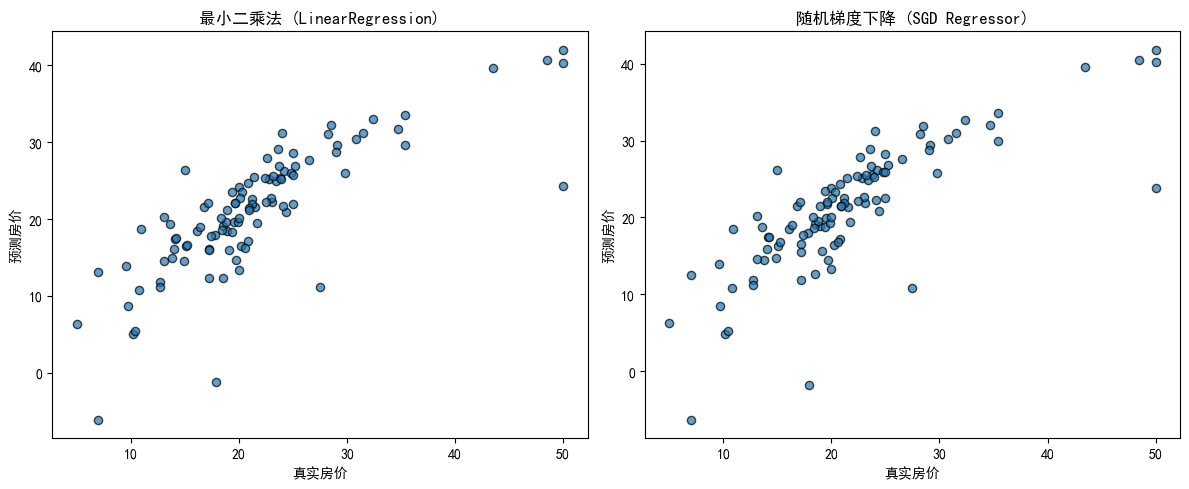

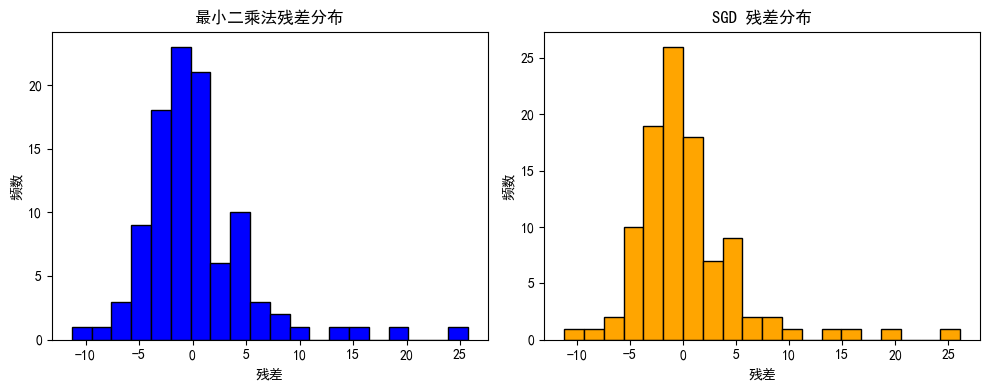

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 最小二乘
ax[0].scatter(y_test, y_pred_ls, alpha=0.7, edgecolors='k', s=35)
ax[0].set_title('最小二乘法 (LinearRegression)')
ax[0].set_xlabel('真实房价')
ax[0].set_ylabel('预测房价')

# SGD
ax[1].scatter(y_test, y_pred_gd, alpha=0.7, edgecolors='k', s=35)
ax[1].set_title('随机梯度下降 (SGD Regressor)')
ax[1].set_xlabel('真实房价')
ax[1].set_ylabel('预测房价')

plt.tight_layout()
plt.show()

# ========== 3. 残差分布直方图 ==========
residual_ls = y_test - y_pred_ls
residual_gd = y_test - y_pred_gd

plt.figure(figsize=(10, 4))

# 最小二乘残差
plt.subplot(1, 2, 1)
plt.hist(residual_ls, bins=20, color='blue', edgecolor='black')
plt.title('最小二乘法残差分布')
plt.xlabel('残差')
plt.ylabel('频数')

# SGD 残差
plt.subplot(1, 2, 2)
plt.hist(residual_gd, bins=20, color='orange', edgecolor='black')
plt.title('SGD 残差分布')
plt.xlabel('残差')
plt.ylabel('频数')

plt.tight_layout()
plt.show()